In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/emergency_classification/emergency_classification/emergency_classification.csv
/kaggle/input/emergency_classification/emergency_classification/images/1441.jpg
/kaggle/input/emergency_classification/emergency_classification/images/2051.jpg
/kaggle/input/emergency_classification/emergency_classification/images/1111.jpg
/kaggle/input/emergency_classification/emergency_classification/images/2184.jpg
/kaggle/input/emergency_classification/emergency_classification/images/1436.jpg
/kaggle/input/emergency_classification/emergency_classification/images/2166.jpg
/kaggle/input/emergency_classification/emergency_classification/images/145.jpg
/kaggle/input/emergency_classification/emergency_classification/images/1912.jpg
/kaggle/input/emergency_classification/emergency_classification/images/1313.jpg
/kaggle/input/emergency_classification/emergency_classification/images/672.jpg
/kaggle/input/emergency_classification/emergency_classification/images/1765.jpg
/kaggle/input/emergency_class

/kaggle/input/emergency_classification/emergency_classification/images/1727.jpg
/kaggle/input/emergency_classification/emergency_classification/images/966.jpg
/kaggle/input/emergency_classification/emergency_classification/images/1559.jpg
/kaggle/input/emergency_classification/emergency_classification/images/724.jpg
/kaggle/input/emergency_classification/emergency_classification/images/1232.jpg
/kaggle/input/emergency_classification/emergency_classification/images/948.jpg
/kaggle/input/emergency_classification/emergency_classification/images/332.jpg
/kaggle/input/emergency_classification/emergency_classification/images/593.jpg
/kaggle/input/emergency_classification/emergency_classification/images/1742.jpg
/kaggle/input/emergency_classification/emergency_classification/images/418.jpg
/kaggle/input/emergency_classification/emergency_classification/images/1721.jpg
/kaggle/input/emergency_classification/emergency_classification/images/863.jpg
/kaggle/input/emergency_classification/emergenc

In [2]:
data = pd.read_csv("../input/emergency_classification/emergency_classification/emergency_classification.csv")

In [3]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [5]:
data["emergency_or_not"].value_counts(normalize=True)

0    0.578656
1    0.421344
Name: emergency_or_not, dtype: float64

In [7]:
data.columns


Index(['image_names', 'emergency_or_not'], dtype='object')

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#load all images in list then convert to array
X = []
for i in data["image_names"]:
    tmp = plt.imread("../input/emergency_classification/emergency_classification/images/"+i)
    X.append(tmp)

In [9]:
X = np.array(X)
y = np.array(data["emergency_or_not"])

In [10]:
X.shape

(2352, 224, 224, 3)

In [11]:
X = X.reshape(2352,224*224*3
         )

In [12]:
X.shape

(2352, 150528)

In [14]:
X = X/X.max()

In [18]:
from sklearn.model_selection import train_test_split

In [62]:
?train_test_split

In [63]:
x_train,x_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.3,random_state=42)

In [64]:
x_train.shape,x_valid.shape

((1646, 150528), (706, 150528))

In [65]:
from keras.models import Sequential
from keras.layers import Dense,InputLayer

In [66]:
model = Sequential()


In [67]:
model.add(Dense(100,input_shape=(150528,),activation = 'sigmoid'))

In [68]:
model.add(Dense(1,activation = 'sigmoid'))

In [69]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
model.fit(x_train,y_train,batch_size=128,validation_data=(x_valid,y_valid),epochs=10)

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.8145 - acc: 0.5753 - val_loss: 0.6400 - val_acc: 0.6700
Epoch 2/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6302 - acc: 0.6574 - val_loss: 0.6233 - val_acc: 0.6459
Epoch 3/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6441 - acc: 0.6276 - val_loss: 0.6343 - val_acc: 0.6303
Epoch 4/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6147 - acc: 0.6628 - val_loss: 0.6491 - val_acc: 0.6119
Epoch 5/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6231 - acc: 0.6549 - val_loss: 0.6675 - val_acc: 0.5963
Epoch 6/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6029 - acc: 0.6804 - val_loss: 0.6147 - val_acc: 0.6416
Epoch 7/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6169 - acc: 0.6592 - val_loss: 0.5832 - val_acc: 0.6926
Epoch 8/10
1646

In [71]:
_,v_img,_,v_label = train_test_split(data["image_names"],data["emergency_or_not"],test_size = 0.3,random_state=42)

In [72]:
pred_class = model.predict_classes(x_valid)

In [73]:
pred = model.predict(x_valid)

In [74]:
# we will pick a random image from validation data , see its actual label and compare with probability and predicted label

In [102]:
rng = np.random.RandomState(1)

In [103]:
rand_index = rng.choice(range(len(x_valid)))

In [104]:
rand_index

37

In [105]:
pred_class[rand_index],pred[rand_index]

(array([0], dtype=int32), array([0.3239389], dtype=float32))

In [106]:
img = plt.imread("../input/emergency_classification/emergency_classification/images/"+v_img.iloc[rand_index])

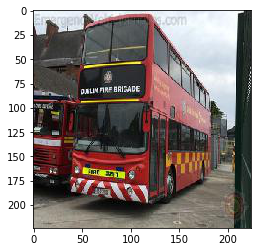

In [107]:
plt.imshow(img)


In [108]:
v_label.iloc[rand_index]

1

In [109]:
# change activation function to tanh

model=Sequential()
model.add(Dense(100,input_shape=(150528,),activation = 'tanh'))
model.add(Dense(1,activation = 'tanh'))
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128,validation_data=(x_valid,y_valid),epochs=10)

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 4s 2ms/step - loss: 9.0327 - acc: 0.4149 - val_loss: 8.9422 - val_acc: 0.4391
Epoch 2/10
1646/1646 [==============================] - 3s 2ms/step - loss: 9.3465 - acc: 0.4137 - val_loss: 8.9422 - val_acc: 0.4391
Epoch 3/10
1646/1646 [==============================] - 3s 2ms/step - loss: 9.3465 - acc: 0.4137 - val_loss: 8.9422 - val_acc: 0.4391
Epoch 4/10
1646/1646 [==============================] - 3s 2ms/step - loss: 9.3465 - acc: 0.4137 - val_loss: 8.9422 - val_acc: 0.4391
Epoch 5/10
1646/1646 [==============================] - 3s 2ms/step - loss: 9.3465 - acc: 0.4137 - val_loss: 8.9422 - val_acc: 0.4391
Epoch 6/10
1646/1646 [==============================] - 3s 2ms/step - loss: 9.3465 - acc: 0.4137 - val_loss: 8.9422 - val_acc: 0.4391
Epoch 7/10
1646/1646 [==============================] - 3s 2ms/step - loss: 9.3465 - acc: 0.4137 - val_loss: 8.9422 - val_acc: 0.4391
Epoch 8/10
1646

# changing activation function to tanh reduced the accuracy

In [110]:
# increase neurons to 1024 in hidden layer


model=Sequential()
model.add(Dense(1024,input_shape=(150528,),activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128,validation_data=(x_valid,y_valid),epochs=10)

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 7s 4ms/step - loss: 1.4546 - acc: 0.5140 - val_loss: 0.7225 - val_acc: 0.4958
Epoch 2/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.7096 - acc: 0.5614 - val_loss: 0.6211 - val_acc: 0.6856
Epoch 3/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6327 - acc: 0.6452 - val_loss: 0.6087 - val_acc: 0.6841
Epoch 4/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6601 - acc: 0.6009 - val_loss: 0.6469 - val_acc: 0.5992
Epoch 5/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6371 - acc: 0.6252 - val_loss: 0.6324 - val_acc: 0.6246
Epoch 6/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.5940 - acc: 0.7011 - val_loss: 0.6189 - val_acc: 0.6487
Epoch 7/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6804 - acc: 0.5887 - val_loss: 0.6395 - val_acc: 0.6176
Epoch 8/10
1646

In [111]:
# increase epochs to 50 in hidden layer


model=Sequential()
model.add(Dense(1024,input_shape=(150528,),activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128,validation_data=(x_valid,y_valid),epochs=50)

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 7s 4ms/step - loss: 1.2724 - acc: 0.5365 - val_loss: 1.2185 - val_acc: 0.5609
Epoch 2/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.7732 - acc: 0.5522 - val_loss: 0.6258 - val_acc: 0.6544
Epoch 3/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6372 - acc: 0.6343 - val_loss: 0.6102 - val_acc: 0.6700
Epoch 4/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6226 - acc: 0.6580 - val_loss: 0.6006 - val_acc: 0.6771
Epoch 5/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6931 - acc: 0.5954 - val_loss: 0.6711 - val_acc: 0.5977
Epoch 6/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.5920 - acc: 0.7053 - val_loss: 0.5867 - val_acc: 0.6941
Epoch 7/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.5798 - acc: 0.7066 - val_loss: 0.6436 - val_acc: 0.6176
Epoch 8/50
1646

In [112]:
# change optimizer to Adam 

from keras.optimizers import Adam

In [114]:
adam = Adam(lr=1e-5)

In [115]:
model=Sequential()
model.add(Dense(1024,input_shape=(150528,),activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128,validation_data=(x_valid,y_valid),epochs=50)

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 9s 6ms/step - loss: 1.1056 - acc: 0.5492 - val_loss: 0.9866 - val_acc: 0.5609
Epoch 2/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.7034 - acc: 0.6142 - val_loss: 0.6413 - val_acc: 0.6416
Epoch 3/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6062 - acc: 0.6756 - val_loss: 0.5835 - val_acc: 0.6955
Epoch 4/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5742 - acc: 0.7126 - val_loss: 0.5747 - val_acc: 0.7125
Epoch 5/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5538 - acc: 0.7357 - val_loss: 0.5744 - val_acc: 0.6969
Epoch 6/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5520 - acc: 0.7260 - val_loss: 0.5745 - val_acc: 0.7025
Epoch 7/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5478 - acc: 0.7242 - val_loss: 0.5781 - val_acc: 0.6841
Epoch 8/50
1646